In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

***
# Ayudantía 02
## ACUS099- Procesamiento digital de señales
### 7 de Mayo
#####  Como *shiftear* una señal: Camino a la convolución
Profesor: Dr. Victor Poblete R.

Ayudante: Diego Espejo A.
***

### Convolución
Una convolución es un operador matemático que transforma dos funciones $f$ y $g$ en una tercera función que en cierto sentido representa la magnitud en la que se superponen $f$ y una versión trasladada e invertida de $g$.
***
Es la técnica más importante en el $\textit{procesamiento de señal digital}$. Utilizando la estrategia de descomposición por impulso, los sistemas se describen mediante una señal llamada $\textit{respuesta impulso}$. La $\textit{convolución}$ es importante porque relaciona las tres señales de interés: $\textit{la señal de entrada, la señal de salida}$ y $\textit{la respuesta impulso}$. Esta técnica proporciona el marco matemático para *PDS*.
***
***
### Shiftting 
Shift se traduce como un cambio, en el *PDS* es una etapa dentro de la $\textit{convolución}$ en donde la $\textit{señal respuesta impulso}$ es trasladada e invertida.
***
***
En este cuadernillo veremos las herramientas necesarias para realizar este proceso de *Shiftteo*.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time
from IPython import display
import warnings
warnings.filterwarnings("ignore")

In [3]:
t_end = 2
l     = 3
hz    = 10
sr    = hz*2
w     = 2*np.pi*hz
t     = np.linspace(0,t_end,num=sr*t_end)
A     = 3
e     = np.exp(-l*t) 
sig   = A*e*np.cos(w*t)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


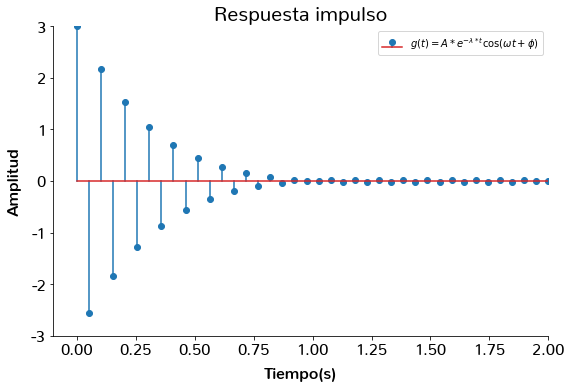

In [4]:
#Preparacion grafico 1
plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_axisbelow(True) 
ax.stem(t,sig,label='$g(t)=A*e^{-\lambda*t}\cos{(\omega t + \phi)}$')
ax.set_xlabel('Tiempo(s)',family='nunito', fontsize=16, weight='bold', labelpad=10)
ax.set_ylabel('Amplitud',family='nunito', fontsize=16, weight='bold', labelpad=10)
ax.set_title('Respuesta impulso',family='nunito',fontsize=20)
plt.ylim(-3, 3)
plt.xlim(-0.1,t_end)
for tl in ax.get_yticklabels():
    tl.set_color('k')
plt.legend()
plt.show()

###### Zero padding
Es un concepto simple; simplemente se refiere a agregar ceros al comienzo o final de una señal de dominio de tiempo para aumentar su longitud.

In [5]:
len_ceros         = sr*t_end
zero_pad          = np.zeros(len_ceros)
center_sig        = np.concatenate((zero_pad,sig,zero_pad))
invert_center_sig = np.flip(center_sig)
T                 = np.linspace(0-t_end,t_end*2,3*len_ceros)

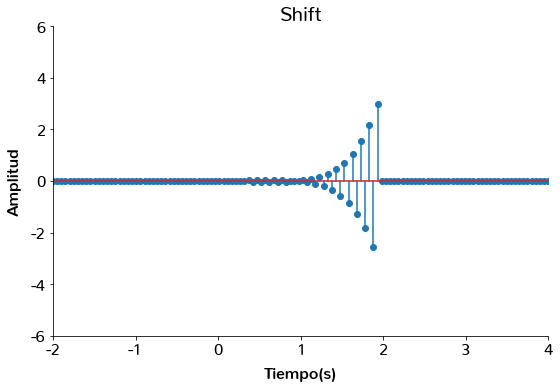

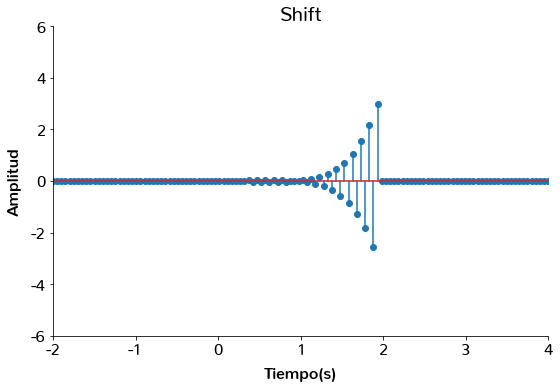

In [11]:
plt.figure(figsize=(8, 5))
for i in range(len(center_sig)):
    if i >= 2*len_ceros:
        break
    shift_sig = np.roll(invert_center_sig,len_ceros+i)
    plt.clf()
    ax = plt.gca()
    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_axisbelow(True) 
    ax.stem(T,shift_sig)
    ax.set_xlabel('Tiempo(s)',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_ylabel('Amplitud',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_title('Shift',family='nunito',fontsize=20)
    plt.ylim(-6, 6)
    plt.xlim(-t_end,2*t_end)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)